# Image Compression with Singular Value Decomposition



A single value decomposition of a real matrix $\mathbf{A} \in \mathbb{R}^{m \times n}$ is:   $\mathbf{A} = \mathbf{U}\mathbf{D}\mathbf{V}^T\;,$

where $\mathbf{D} \in \mathbb{R}^{m \times n}$ has nonzero entries along its diagonal and where $\mathbf{U} \in \mathbb{R}^{m \times m}$ and $\mathbf{V} \in \mathbb{R}^{n \times n}$ are orthogonal matrices. The singular value $\sigma_i$ collectively give some measure of how large the matrix A is. 

In [66]:
from matplotlib import pyplot as plt
import numpy as np

def compare_images(A, A_):

    fig, axarr = plt.subplots(1, 2, figsize = (7, 3))

    axarr[0].imshow(A, cmap = "Greys")
    axarr[0].axis("off")
    axarr[0].set(title = "original image")

    axarr[1].imshow(A_, cmap = "Greys")
    axarr[1].axis("off")
    axarr[1].set(title = "reconstructed image")


This compare_images function will help display the original image and the converted image.

In [67]:
import PIL
import urllib

def read_image(url):
    return np.array(PIL.Image.open(urllib.request.urlopen(url)))

url = "https://upload.wikimedia.org/wikipedia/commons/thumb/0/0f/1665_Girl_with_a_Pearl_Earring.jpg/540px-1665_Girl_with_a_Pearl_Earring.jpg"

img = read_image(url)

Here, we will access an RGB image of "Girl with a Pearl Earring" by Vermeer from the internet by its URL. Then, we will download it, and convert it to greyscale.

[Text(0.5, 1.0, 'greyscale')]

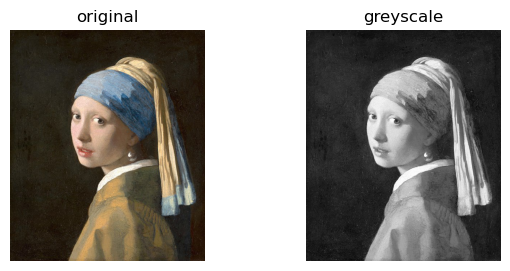

In [68]:
fig, axarr = plt.subplots(1, 2, figsize = (7, 3))

def to_greyscale(im):
    return 1 - np.dot(im[...,:3], [0.2989, 0.5870, 0.1140])

grey_img = to_greyscale(img)

axarr[0].imshow(img)
axarr[0].axis("off")
axarr[0].set(title = "original")

axarr[1].imshow(grey_img, cmap = "Greys")
axarr[1].axis("off")
axarr[1].set(title = "greyscale")

Via the process above, we have the original image taken from the internet and a greyscale replica of it. We can use the SVD pipeline to construct approximations of this image. This task is called image compression and it is an important problem for storing large quantities of images on computers that may have small amounts of storage.


We will now go ahead and reconstruct an image from its singular value decomposition:

In [69]:
def svd_reconstruct(img, k):
    U, sigma, V = np.linalg.svd(img)

    # create the D matrix in the SVD
    D = np.zeros_like(img,dtype=float)                       # matrix of zeros of same shape as A
    D[:min(img.shape),:min(img.shape)] = np.diag(sigma)      # singular values on the main diagonal
    
    U = U[:,:k]
    D = D[:k, :k]
    V = V[:k, :]

    img = U @ D @ V 

    return  img

The svd_reconstruct function takes 2 arguments: the image to reconstruct, and the number k of singular values to use.

The compression factor, the number of bits required to store the compressed image, divided by the number of bits required to store the original image, is log2K / 24. 

We will go ahead and experiment with different K values.

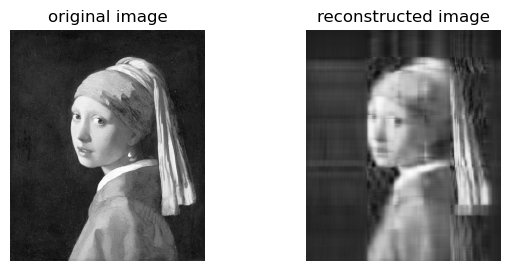

In [70]:
reconstructed_img = svd_reconstruct(grey_img, 10)
compare_images(grey_img, reconstructed_img)

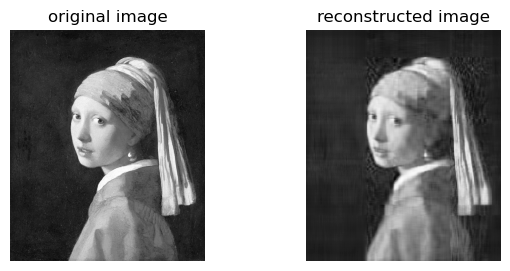

In [71]:
reconstructed_img = svd_reconstruct(grey_img, 20)
compare_images(grey_img, reconstructed_img)

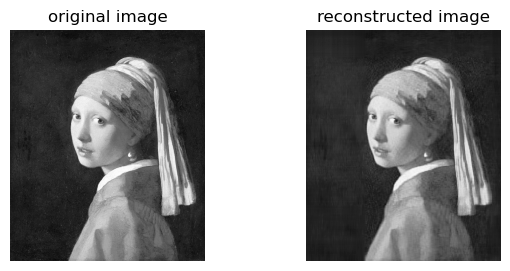

In [75]:
reconstructed_img = svd_reconstruct(grey_img, 50)
compare_images(grey_img, reconstructed_img)

Seems like a k value of 50 allows us to not be able to distinguish the reconstructed image from the original by eye. The amount of storage needed for your reconstruction as a fraction of the amount of storage needed for the original image is: log2(5) / 24.

# Extra parameters added to svd_reconstruct

We will change a few things to our function to allow user to be able to specific the compression ratio and the epsilon threshold.

In [73]:
def user_svd_reconstruct(img, comp_factor, threshold):
    U, sigma, V = np.linalg.svd(img)

    M = img.shape[0]
    N = img.shape[1]

    # k must be less than m and n
    k = round((N * M) / ((N + M + 1) * comp_factor))

    # create the D matrix in the SVD
    D = np.zeros_like(img,dtype=float)                       # matrix of zeros of same shape as A
    for value in sigma:
        if (value > threshold): 
            D[:min(img.shape),:min(img.shape)] = np.diag(sigma)      # singular values on the main diagonal
    
    U = U[:,:k]
    D = D[:k, :k]
    V = V[:k, :]

    img = U @ D @ V 

    return  img

The user_svd_reconstruct function have three arguments: the image to reconstruct, and the compression factor, and a desired threshold epsilon. The user can enter the desired compression factor and threshold epsilon. We will go ahead and experiment on different compression ratios and thresholds. 

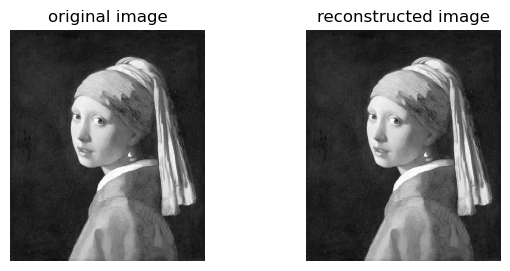

In [74]:
reconstructed_img = user_svd_reconstruct(grey_img, 0.2, 1.5)
compare_images(grey_img, reconstructed_img)